In [57]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

from utils import NEW_STRUCT_PEOPLE, NEW_MULTIMODAL_TIMESERIES


In [4]:
filtered_people = sorted(list(set(NEW_MULTIMODAL_TIMESERIES)
                              .intersection(set(NEW_STRUCT_PEOPLE))))

def get_struct_path(person):
    return f'../hcp_multimodal_parcellation/HCP_tracks_matrices_BN_withcerebellum/{person}/{person}_{person}_BN_Atlas_246_1mm_geom_withcerebellum_RS.txt'


def get_timeseries_path(person, session_day):
    return f'../hcp_multimodal_parcellation/concatenated_timeseries/{person}_{session_day}.npy'

## This takes too much memory for quickness 

In [50]:
means = {1: {'lr' : [], 'rl': []},
         2: {'lr' : [], 'rl': []}}
stds = {1: {'lr' : [], 'rl': []},
        2: {'lr' : [], 'rl': []}}

flatten_values = {1: {'lr' : [], 'rl': []},
                  2: {'lr' : [], 'rl': []}}

mins = {1: {'lr' : np.inf, 'rl': np.inf},
        2: {'lr' : np.inf, 'rl': np.inf}}

maxs = {1: {'lr' : -np.inf, 'rl': -np.inf},
        2: {'lr' : -np.inf, 'rl': -np.inf}}

for person in filtered_people:
    for session in [1, 2]:
        try:
            timeseries = np.load(get_timeseries_path(person, session))
            ts_lr = timeseries[:, :1200]
            ts_rl = timeseries[:, 1200:]
            
            means[session]['lr'].extend(ts_lr.mean(axis=1).tolist())
            means[session]['rl'].extend(ts_rl.mean(axis=1).tolist())
            
            stds[session]['lr'].extend(ts_lr.std(axis=1).tolist())
            stds[session]['rl'].extend(ts_rl.std(axis=1).tolist())
            
            flatten_values[session]['lr'].extend(ts_lr.flatten().tolist())
            flatten_values[session]['rl'].extend(ts_rl.flatten().tolist())
            
            if ts_lr.min() < mins[session]['lr']:
                mins[session]['lr'] = ts_lr.min()
            if ts_lr.max() > maxs[session]['lr']:
                maxs[session]['lr'] = ts_lr.max()
            if ts_rl.min() < mins[session]['rl']:
                mins[session]['rl'] = ts_rl.min()
            if ts_rl.max() > maxs[session]['rl']:
                maxs[session]['rl'] = ts_rl.max()
            
        except FileNotFoundError:
            continue

In [31]:
# Just random checks
print(timeseries.shape)
print(timeseries.mean(axis=1).shape)
print(timeseries[:,:-1200].shape)
print(timeseries[:,1200:].shape)

print(timeseries[0,0])
print(timeseries[0,1200])
print(timeseries[:,:1200][0,0]) #lr
print(timeseries[:,1200:][0,0]) #rl

(272, 2400)
(272,)
(272, 1200)
(272, 1200)
12413.79241
13005.73171
12413.79241
13005.73171


# Mins / Maxs values

In [86]:
print("MIN Session 1 - lr", ":", mins[1]['lr'])
print("MIN Session 1 - rl", ":", mins[1]['rl'])
print("MIN Session 2 - lr", ":", mins[2]['lr'])
print("MIN Session 2 - rl", ":", mins[2]['rl'])
print()
print("MAX Session 1 - lr", ":", maxs[1]['lr'])
print("MAX Session 1 - rl", ":", maxs[1]['rl'])
print("MAX Session 2 - lr", ":", maxs[2]['lr'])
print("MAX Session 2 - rl", ":", maxs[2]['rl'])

MIN Session 1 - lr : 266.7725658
MIN Session 1 - rl : 1062.251916
MIN Session 2 - lr : 1096.577173
MIN Session 2 - rl : 1347.882819

MAX Session 1 - lr : 20724.72331
MAX Session 1 - rl : 20303.44728
MAX Session 2 - lr : 20388.89633
MAX Session 2 - rl : 20531.27028


# Means

Min/Max lr - session 1 292.6902307641667 / 20512.40769050833
Min/Max rl - session 1 1154.9159263008332 / 20116.798048241668


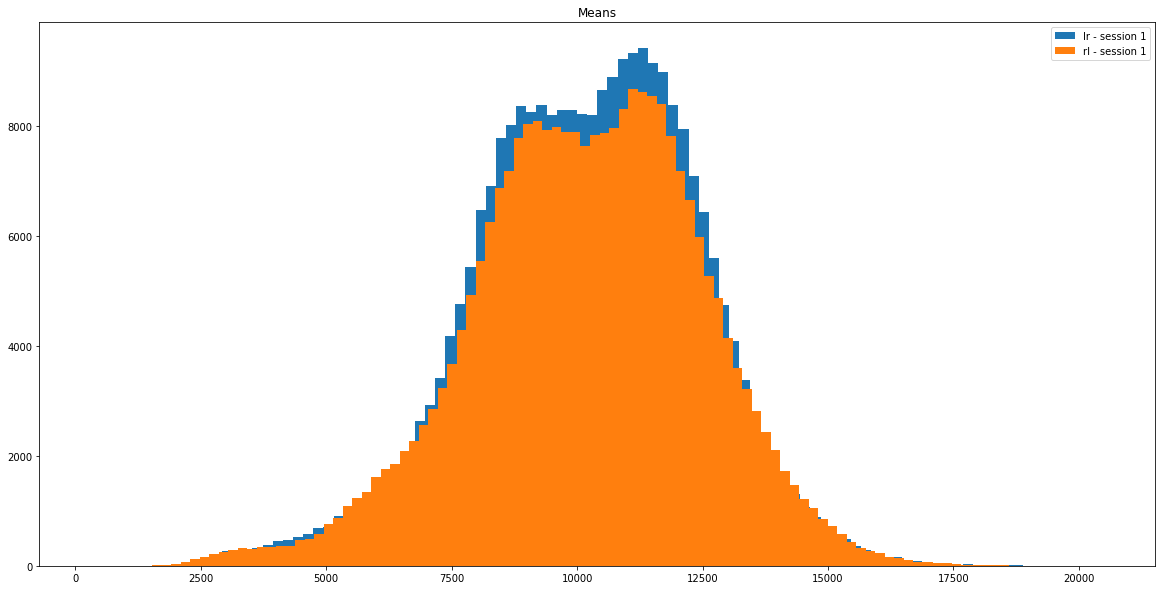

In [97]:
# Means of session 1

print("Min/Max", "lr - session 1", min(means[1]['lr']), "/", max(means[1]['lr']))
print("Min/Max", "rl - session 1", min(means[1]['rl']), "/", max(means[1]['rl']))
plt.figure(figsize=(20,10))
_ = plt.hist(means[1]['lr'], bins=100, label='lr - session 1')
_ = plt.hist(means[1]['rl'], bins=100, label='rl - session 1')
plt.legend()
plt.title("Means")
plt.show()
plt.close()

Min/Max lr - session 2 1280.4470497133334 / 19959.734587775
Min/Max rl - session 2 1490.9876083416666 / 19913.837759566668


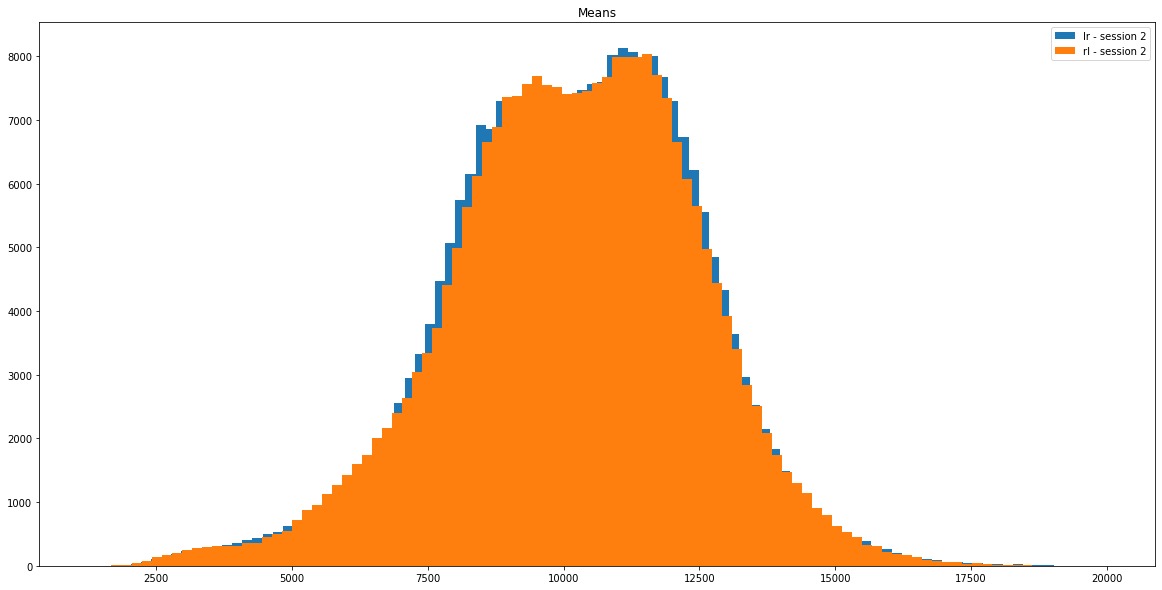

In [98]:
# Means of session 2

print("Min/Max", "lr - session 2", min(means[2]['lr']), "/", max(means[2]['lr']))
print("Min/Max", "rl - session 2", min(means[2]['rl']), "/", max(means[2]['rl']))
plt.figure(figsize=(20,10))
_ = plt.hist(means[2]['lr'], bins=100, label='lr - session 2')
_ = plt.hist(means[2]['rl'], bins=100, label='rl - session 2')
plt.legend()
plt.title("Means")
plt.show()
plt.close()

Min/Max Session 1 - lr 292.6902307641667 / 20512.40769050833
Min/Max Session 2 - lr 1280.4470497133334 / 19959.734587775


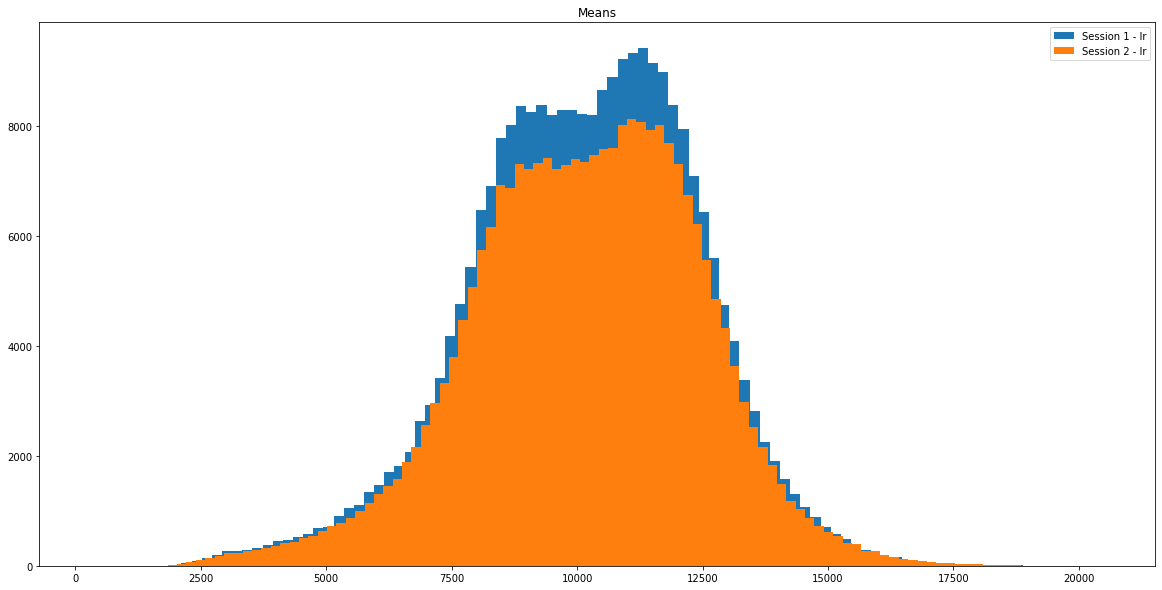

In [99]:
# Means of LR

print("Min/Max", "Session 1 - lr", min(means[1]['lr']), "/", max(means[1]['lr']))
print("Min/Max", "Session 2 - lr", min(means[2]['lr']), "/", max(means[2]['lr']))
plt.figure(figsize=(20,10))
_ = plt.hist(means[1]['lr'], bins=100, label='Session 1 - lr')
_ = plt.hist(means[2]['lr'], bins=100, label='Session 2 - lr')
plt.legend()
plt.title("Means")
plt.show()
plt.close()

Min/Max Session 1 - rl 292.6902307641667 / 20116.798048241668
Min/Max Session 2 - rl 1280.4470497133334 / 19913.837759566668


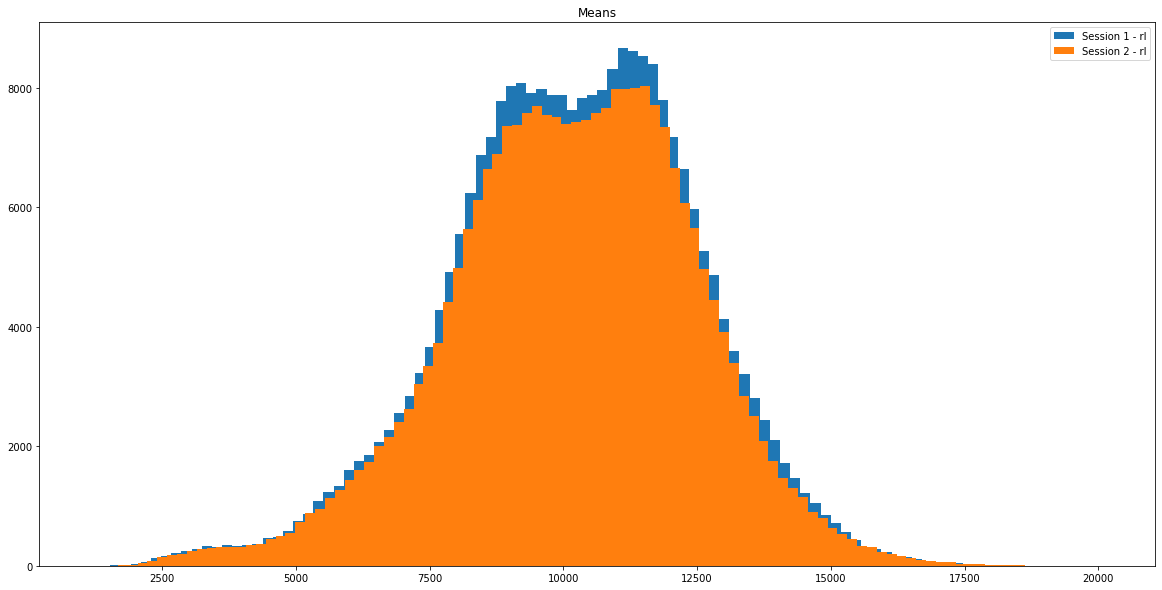

In [100]:
# Means of RL

print("Min/Max", "Session 1 - rl", min(means[1]['lr']), "/", max(means[1]['rl']))
print("Min/Max", "Session 2 - rl", min(means[2]['lr']), "/", max(means[2]['rl']))
plt.figure(figsize=(20,10))
_ = plt.hist(means[1]['rl'], bins=100, label='Session 1 - rl')
_ = plt.hist(means[2]['rl'], bins=100, label='Session 2 - rl')
plt.legend()
plt.title("Means")
plt.show()
plt.close()

# Stds

Min/Max lr - session 1 4.8349750250323105 / 912.8911380227452
Min/Max rl - session 1 7.817040597876055 / 350.6655487712939


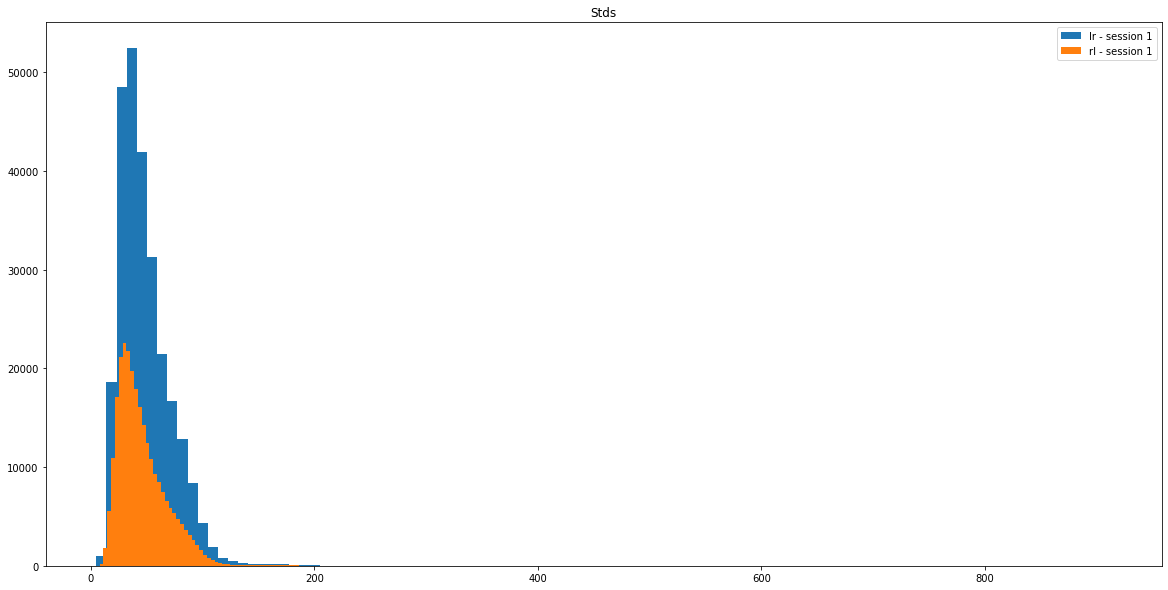

In [101]:
# stds of session 1

print("Min/Max", "lr - session 1", min(stds[1]['lr']), "/", max(stds[1]['lr']))
print("Min/Max", "rl - session 1", min(stds[1]['rl']), "/", max(stds[1]['rl']))
plt.figure(figsize=(20,10))
_ = plt.hist(stds[1]['lr'], bins=100, label='lr - session 1')
_ = plt.hist(stds[1]['rl'], bins=100, label='rl - session 1')
plt.legend()
plt.title("Stds")
plt.show()
plt.close()

Min/Max lr - session 2 7.807193547673786 / 591.5179275435967
Min/Max rl - session 2 7.562117070037533 / 252.44207290438763


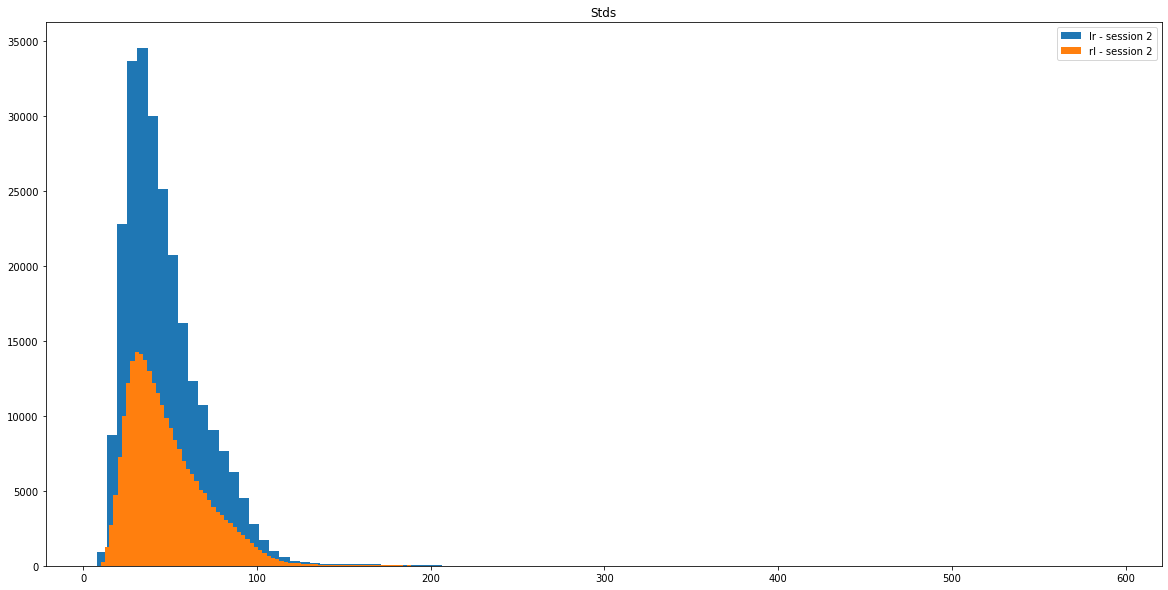

In [102]:
# stds of session 2

print("Min/Max", "lr - session 2", min(stds[2]['lr']), "/", max(stds[2]['lr']))
print("Min/Max", "rl - session 2", min(stds[2]['rl']), "/", max(stds[2]['rl']))
plt.figure(figsize=(20,10))
_ = plt.hist(stds[2]['lr'], bins=100, label='lr - session 2')
_ = plt.hist(stds[2]['rl'], bins=100, label='rl - session 2')
plt.legend()
plt.title("Stds")
plt.show()
plt.close()

Min/Max Session 1 - lr 4.8349750250323105 / 912.8911380227452
Min/Max Session 2 - lr 7.807193547673786 / 591.5179275435967


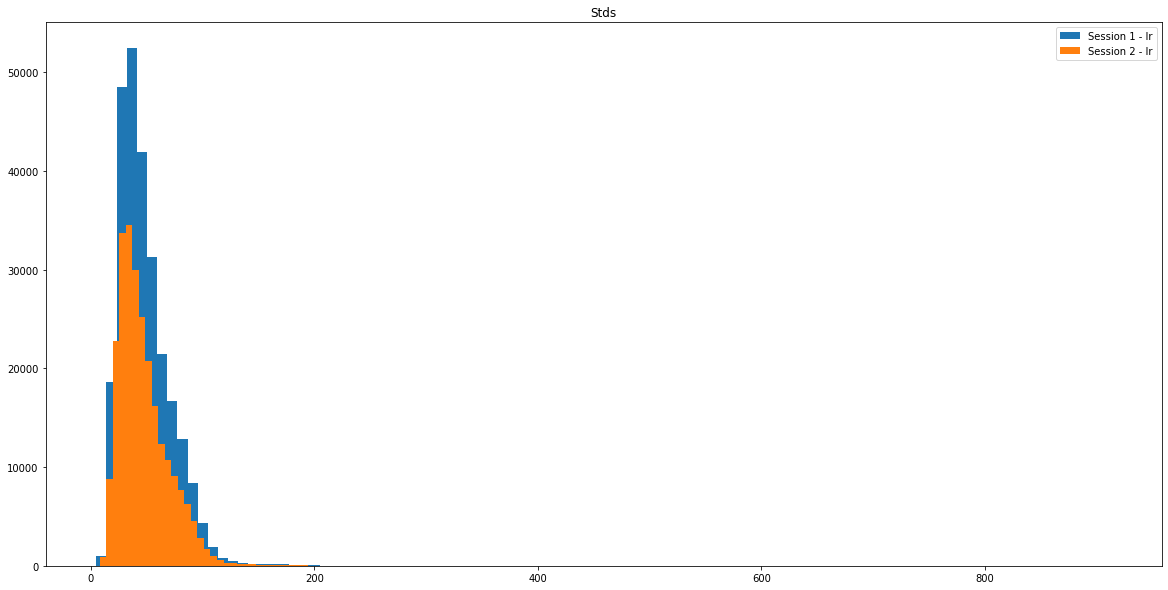

In [103]:
# stds of LR

print("Min/Max", "Session 1 - lr", min(stds[1]['lr']), "/", max(stds[1]['lr']))
print("Min/Max", "Session 2 - lr", min(stds[2]['lr']), "/", max(stds[2]['lr']))
plt.figure(figsize=(20,10))
_ = plt.hist(stds[1]['lr'], bins=100, label='Session 1 - lr')
_ = plt.hist(stds[2]['lr'], bins=100, label='Session 2 - lr')
plt.legend()
plt.title("Stds")
plt.show()
plt.close()

Min/Max Session 1 - rl 4.8349750250323105 / 350.6655487712939
Min/Max Session 2 - rl 7.807193547673786 / 252.44207290438763


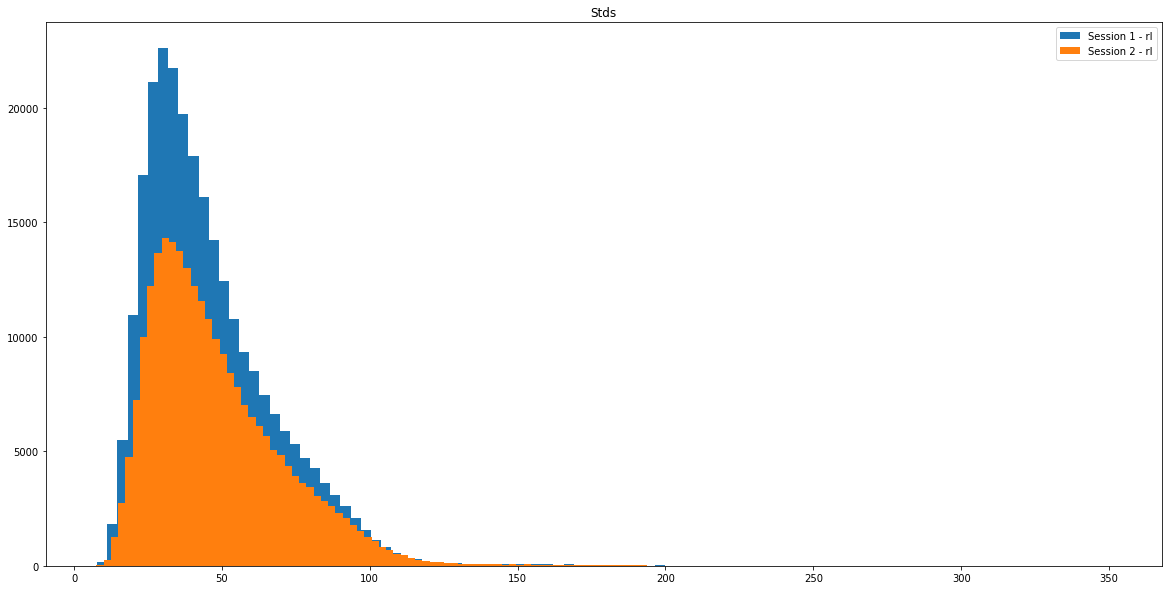

In [104]:
# stds of RL

print("Min/Max", "Session 1 - rl", min(stds[1]['lr']), "/", max(stds[1]['rl']))
print("Min/Max", "Session 2 - rl", min(stds[2]['lr']), "/", max(stds[2]['rl']))
plt.figure(figsize=(20,10))
_ = plt.hist(stds[1]['rl'], bins=100, label='Session 1 - rl')
_ = plt.hist(stds[2]['rl'], bins=100, label='Session 2 - rl')
plt.legend()
plt.title("Stds")
plt.show()
plt.close()

# Flatten values

Min/Max lr - session 1 266.7725658 / 20724.72331
Min/Max rl - session 1 1062.251916 / 20303.44728


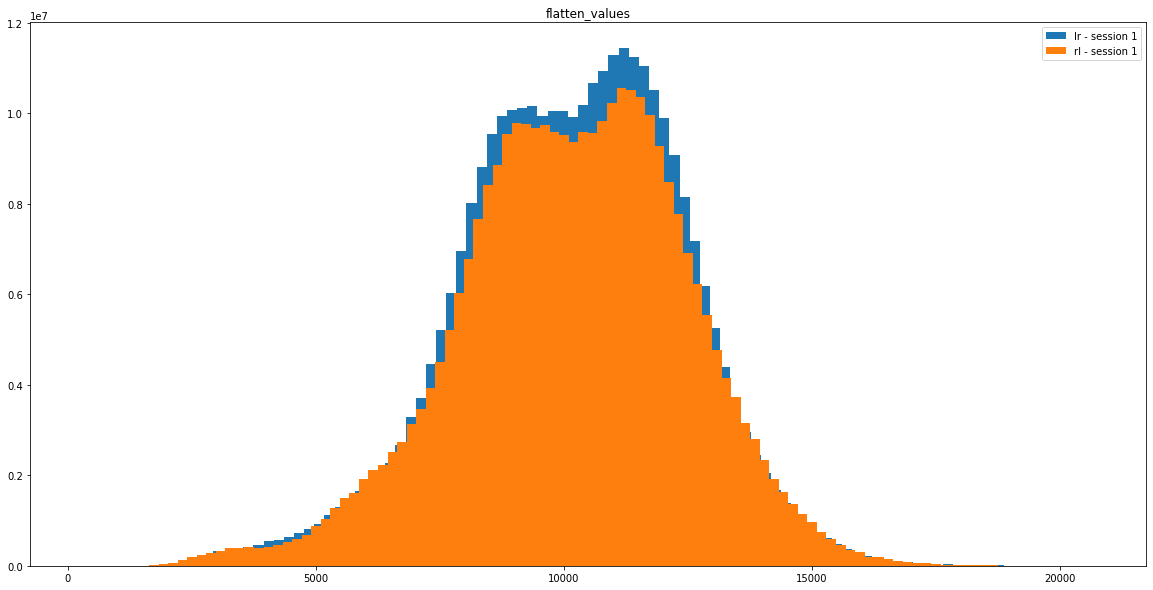

In [105]:
# flatten_values of session 1

print("Min/Max", "lr - session 1", min(flatten_values[1]['lr']), "/", max(flatten_values[1]['lr']))
print("Min/Max", "rl - session 1", min(flatten_values[1]['rl']), "/", max(flatten_values[1]['rl']))
plt.figure(figsize=(20,10))
_ = plt.hist(flatten_values[1]['lr'], bins=100, label='lr - session 1')
_ = plt.hist(flatten_values[1]['rl'], bins=100, label='rl - session 1')
plt.legend()
plt.title("flatten_values")
plt.show()
plt.close()

Min/Max lr - session 2 1096.577173 / 20388.89633
Min/Max rl - session 2 1347.882819 / 20531.27028


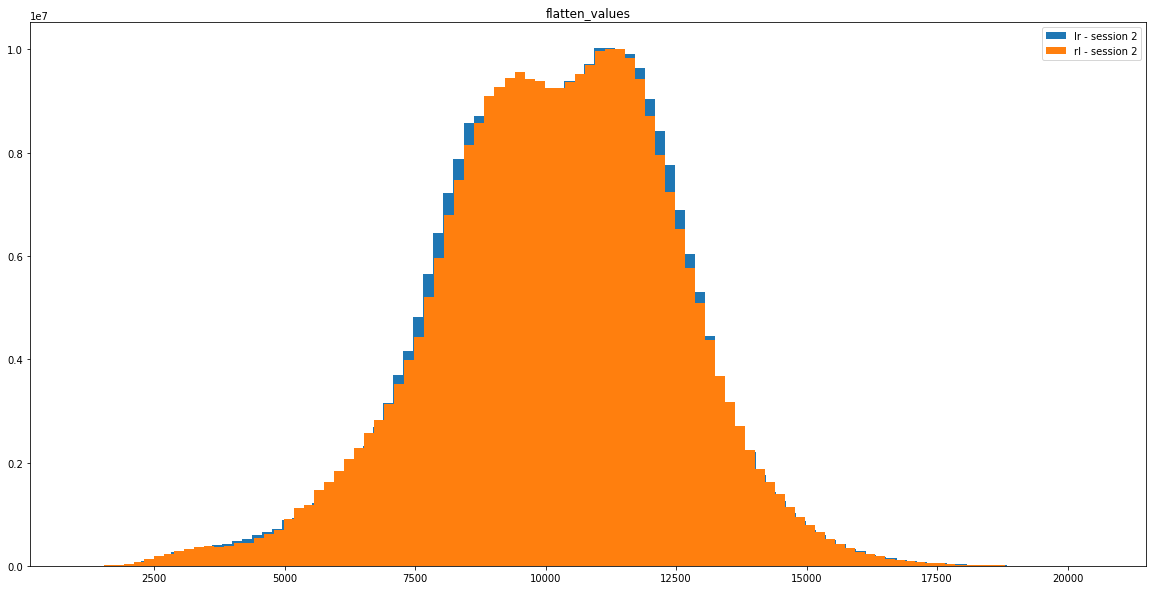

In [106]:
# flatten_values of session 2

print("Min/Max", "lr - session 2", min(flatten_values[2]['lr']), "/", max(flatten_values[2]['lr']))
print("Min/Max", "rl - session 2", min(flatten_values[2]['rl']), "/", max(flatten_values[2]['rl']))
plt.figure(figsize=(20,10))
_ = plt.hist(flatten_values[2]['lr'], bins=100, label='lr - session 2')
_ = plt.hist(flatten_values[2]['rl'], bins=100, label='rl - session 2')
plt.legend()
plt.title("flatten_values")
plt.show()
plt.close()

Min/Max Session 1 - lr 266.7725658 / 20724.72331
Min/Max Session 2 - lr 1096.577173 / 20388.89633


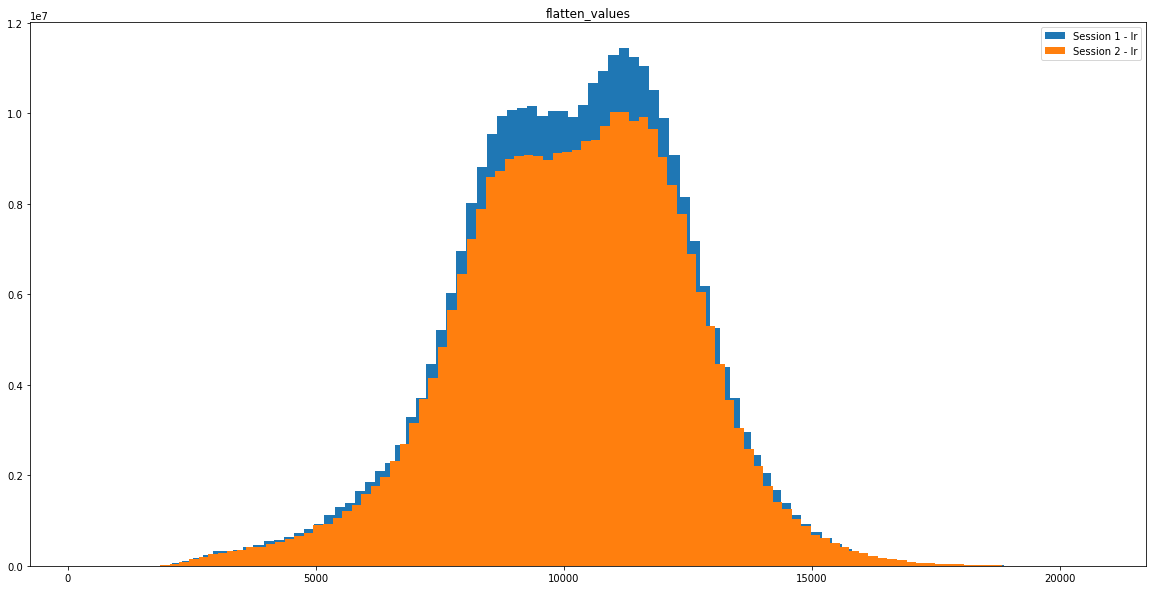

In [107]:
# flatten_values of LR

print("Min/Max", "Session 1 - lr", min(flatten_values[1]['lr']), "/", max(flatten_values[1]['lr']))
print("Min/Max", "Session 2 - lr", min(flatten_values[2]['lr']), "/", max(flatten_values[2]['lr']))
plt.figure(figsize=(20,10))
_ = plt.hist(flatten_values[1]['lr'], bins=100, label='Session 1 - lr')
_ = plt.hist(flatten_values[2]['lr'], bins=100, label='Session 2 - lr')
plt.legend()
plt.title("flatten_values")
plt.show()
plt.close()

Min/Max Session 1 - rl 266.7725658 / 20303.44728
Min/Max Session 2 - rl 1096.577173 / 20531.27028


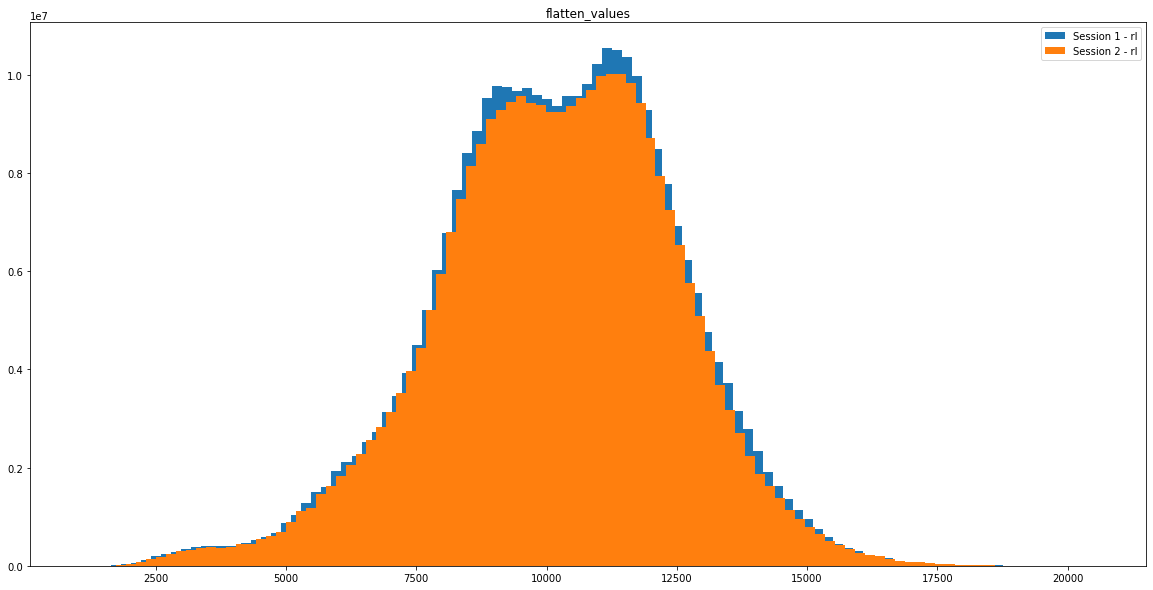

In [108]:
# flatten_values of RL

print("Min/Max", "Session 1 - rl", min(flatten_values[1]['lr']), "/", max(flatten_values[1]['rl']))
print("Min/Max", "Session 2 - rl", min(flatten_values[2]['lr']), "/", max(flatten_values[2]['rl']))
plt.figure(figsize=(20,10))
_ = plt.hist(flatten_values[1]['rl'], bins=100, label='Session 1 - rl')
_ = plt.hist(flatten_values[2]['rl'], bins=100, label='Session 2 - rl')
plt.legend()
plt.title("flatten_values")
plt.show()
plt.close()